In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values (0-255) to 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Flattens 28x28 images to 1D
    Dense(128, activation='relu'),     # Hidden layer
    Dense(10, activation='softmax')    # Output layer for 10 classes
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2637 - accuracy: 0.9262
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1173 - accuracy: 0.9654
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0794 - accuracy: 0.9760
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0595 - accuracy: 0.9822
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0461 - accuracy: 0.9859
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0369 - accuracy: 0.9887
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0292 - accuracy: 0.9917
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0238 - accuracy: 0.9931
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0189 - accuracy: 0.9941
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 2s - loss: 0.1109 - accuracy: 0.9791 - 2s/epoch - 6ms/step

Test accuracy: 0.9791


1/1 [==============================] - 0s 58ms/step


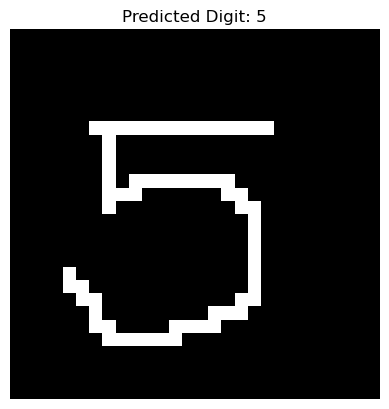

In [67]:
import numpy as np

import cv2

# Load your digit image (grayscale)
img = cv2.imread('img_5.png', cv2.IMREAD_GRAYSCALE)

# Resize to 28x28, invert colors, normalize
img = cv2.resize(img, (28, 28))
img = 255 - img  # MNIST is white on black
img = img / 255.0
img = img.reshape(1, 28, 28)

# Predict
prediction = model.predict(img)
predicted_class = prediction.argmax()

# Show result
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_class}")
plt.axis('off')
plt.show()